# 回归算法：线性回归分析

- 分类型算法：目标值离散
- 回归型算法：目标值连续
- 回归型算法作用：房价预测，销售额预测，贷款额度...

## <mark style=background-color:pink>一、线性回归分析<mark>

### 例：房子面积和价格的关系

|编号|平方米|价格|
|----|-----|----|
|1|60|126|
|2|72|151.2|
|3|75|157.5|
|4|80|168|
|5|83|174.3|
|6|87|180|
|7|90|192.2|
|8|93|194|

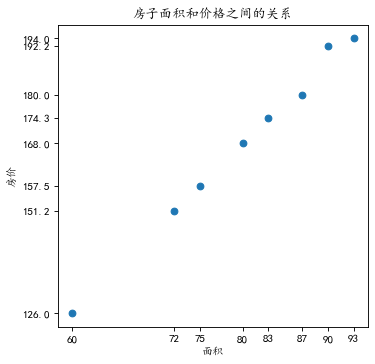

In [5]:
#绘图看看面积和房价的关系

#导入pyplot
from matplotlib import pyplot as plt

#数据
X = [60,72,75,80,83,87,90,93]
Y = [126,151.2,157.5,168,174.3,180,192.2,194]

#设置字体，防止中文和负号乱码
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus']=False


#散点图scatter
plt.figure(figsize=(5,5),dpi=80)
plt.title('房子面积和价格之间的关系')
plt.xlabel('面积')
plt.ylabel('房价')
plt.xticks(X)
plt.yticks(Y)
plt.scatter(X,Y)
plt.show()

从上图可以看出，面积和房价之间存在**线性关系**

**线性关系**：
- 二维：直线关系
- 三维：平面
- 四维：...

### 线性关系模型
- 一个通过属性(特征)的线性组合来进行预测的函数
- **$f(x) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + ... + w_{k}x_{k} + b$**
- $f(x)$：目标值，预测值
- $w_{i}$：每个属性(特征)的权重
- b：偏置项，误差项，可以理解为：$w_{0}x_{0}$，$x_{0}=1$

### 线性回归
- 定义：线性回归通过一个或者多个自变量与因变量之间进行建模的回归分析
- 一元线性回归：自变量只有一个
- 多元线性回归：自变量有两个或两个以上
- 通用公式：$h(w) = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} +... = W^{T}X$，其中W、X为列向量，$x_{0} = 1$

### 迭代的算法
- 回归、神经网络...
- 因为预测的时候预测值和真实值之间有差距，也就是**误差**
- 算法通过不断迭代，使得**误差**达到最小值

### 损失函数
- 误差的大小
- $y_{i}$：第i个训练样本的真实值
- $h_{w}(x_{i})$：第i个训练样本特征值组合预测函数
- 总损失定义：$J(\theta)=\sum_{i=1}^{m} (h_{w}(x_{i}) - y_{i})^{2}$，又称为最小二乘法
- 如何去求模型当中的$W$(各特征的权重系数)，使得损失函数取得最小值？

### 损失函数达到最小值：最小二乘法之正规方程(不作要求)
- 求解：$W = (X^{T}X)^{-1}X^{T}Y$
- X：特征值矩阵
- Y：目标值矩阵
- 直接求到最小值
- 缺点：当特征过于复杂时，求解速度太慢

### 损失函数达到最小值：最小二乘法之梯度下降
- 学习率：lr
- 给定初始权重$W$：${w_{0},w_{1}...}$
- 通过初始权重，学习率，和**损失函数在初始权重的梯度**，不断迭代，直到找到最优权重，使得损失函数达到最小值(可能是局部最小值)
- $w_{i} = w_{i} - lr*gradJ(W)$

### sklearn中的线性回归之正规方程、梯度下降
正规方程：**sklearn.linear_model.LinearRegression**
- 普通最小二乘线性回归
- coef_：回归系数，也就是权重

梯度下降：**sklearn.linear_model.SGDRegressor**
- 通过使用SGD最小化线性模型
- coef_：回归系数，也就会权重

## <mark style=background-color:pink>二、线性回归实例<mark>
- 波士顿房价数据集
    
|属性名|解释|类型|
|------|---|----|
|CRIM|该镇的人均犯罪率|连续型|
|ZN|占地面积超过2.5万平方尺的住宅用地比例|连续型|
|INDUS|非零售商业用地比例|连续型|
|CHAS|是否邻近Charles River|离散型，1=邻近，0=不邻近|
|NOX|一氧化氮浓度|连续型|
|RM|每栋房屋的平均客房数|连续型|
|AGE|1940年之间建成的自用单位比例|连续型|
|DIS|到波士顿5个就业中心的加权距离|连续型|
|RAD|到径向公路的可达性指数|连续型|
|TAX|全值财产税率|连续型|
|PTRATIO|学生与教师的比例|连续型|
|B|1000(BK-0.63)^2,其中BK为黑人占比|连续型|
|LSTAT|低收入人群占比|连续型|
|MEDV|同类房屋价格的中位数|连续型|

### ①波士顿地区房价数据获取

In [1]:
#导入波士顿房价数据集的类
from sklearn.datasets import load_boston

#实例化波士顿房价数据集的类
boston = load_boston()

### ②波士顿地区房价数据集划分

In [1]:
#导入划分训练集和测试集的方法
from sklearn.model_selection import train_test_split

#将波士顿数据集划分为训练集的数据(特征值)，测试集的数据(特征值)，训练集的目标值，测试集的目标值
X_train,X_test,Y_train,Y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=2021)

NameError: name 'boston' is not defined

### ③训练集和测试集数据标准化处理
- 训练集和测试集的每个特征对应的特征值需要标准化处理
- 训练集和测试集的目标值也需要标准化处理

In [3]:
#导入特征工程中标准化处理的类
from sklearn.preprocessing import StandardScaler

#实例化两个征工程中标准化处理的类
std_X = StandardScaler()
std_Y = StandardScaler()

#对训练集和测试集的每个特征对应的特征值进行标准化处理
X_train = std_X.fit_transform(X_train)
X_test = std_X.transform(X_test)

#对训练集和测试集的目标值进行标准化处理,传入数据必须要求是二维的
Y_train = std_Y.fit_transform(Y_train.reshape(-1,1))
Y_test = std_Y.transform(Y_test.reshape(-1,1))

### ④使用最简单的线性回归模型LinearRegression和梯度下降估计SGDRegressor对房价进行预测

In [12]:
#导入正规方程求解的类
from sklearn.linear_model import LinearRegression

#实例化
lr = LinearRegression()

#用标准化处理过后的训练集数据和特征值带入线性回归算法中训练得到模型
lr.fit(X_train,Y_train)

#使用参数_coef看最后得到的线性回归模型中的权重
print('线性回归模型中的回归系数为：',lr.coef_)

#可以预测测试集的房子价格
Y_test_predict_lr = lr.predict(X_test)
print('测试集里面每个房子的预测价格为：',std_Y.inverse_transform(Y_test_predict_lr))

线性回归模型中的回归系数为： [[-0.12423822  0.12444786  0.00773058  0.09499624 -0.21800985  0.28141578
   0.0391382  -0.32841954  0.32495953 -0.22049101 -0.20512339  0.10095817
  -0.44777257]]
测试集里面每个房子的预测价格为： [22.85885078 16.0936965  21.88581704 12.81402904 37.387188   19.08792846
 27.43157599 29.35355651 24.0672894  32.93671349 41.07338339 26.46858395
 16.89146608 42.25600814 33.45093863 24.02040864 22.80646716  8.02368765
  8.41846203 33.67776781 21.431452   13.57186613 13.03136441 31.77215959
 12.89376459 18.33090313 19.95490044 25.6948347  23.39034633 16.76955753
 19.47077071 31.06925511 13.47065759 24.73016956 29.85463255 16.65701344
 26.61197027 17.41344934 34.27779067 26.51024382 20.47895716 28.32961965
 32.09154687 31.37391954  8.69764661 28.52740006 21.16745058 26.30199138
 23.97364206 29.53317702 16.85152895 41.40738495 20.59391001 31.71210733
 18.94230561 22.01696073 24.14991303 23.59023812 34.45328216 22.88694969
 36.31302303 20.339557   12.21413557 24.61540623 25.93316327 21.95277138
 

In [17]:
#导入梯度下降求解的类
from sklearn.linear_model import SGDRegressor

#实例化
sgd = SGDRegressor()

#用标准化处理过后的训练集数据和特征值带入线性回归算法中训练得到模型
sgd.fit(X_train,Y_train)

#使用参数coef_看最后得到的线性回归模型中的权重
print('线性回归模型中的回归系数为：',sgd.coef_)

#可以预测测试集的房子价格
Y_test_predict_sgd = sgd.predict(X_test)
print('测试集里面每个房子的预测价格为：',std_Y.inverse_transform(Y_test_predict_sgd))

线性回归模型中的回归系数为： [-0.10287881  0.08686818 -0.04751992  0.09930885 -0.13964618  0.31838748
  0.01882848 -0.27172511  0.17435356 -0.07563393 -0.18626783  0.10534178
 -0.4210168 ]
测试集里面每个房子的预测价格为： [22.73133873 16.10628167 21.80025013 13.37308713 37.1833794  19.38659124
 27.17629525 28.7858721  23.88388107 32.5517625  41.04729248 26.00611281
 16.86495738 41.74629237 33.12885005 23.64483933 22.71883615  8.68483189
  9.06892074 33.22633873 21.2921399  13.66037096 13.34901957 31.41564305
 13.43628103 18.8105406  20.1442147  25.31705954 23.37796062 16.75642736
 19.28486357 30.63516901 13.79654714 24.56580392 29.36925031 16.71620215
 26.16220379 17.86269706 33.67387237 26.36309087 20.50234433 27.94886332
 31.40751467 30.98275931  8.80280929 28.51484329 21.02366495 25.827185
 23.83211496 29.19593909 16.83644697 40.88338708 20.30802281 31.37208649
 18.70960781 22.07347996 23.9232422  23.3719246  34.15631527 22.74811772
 35.83956568 20.25654174 12.76882647 24.64468498 25.78953453 21.96792085
 22.584

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## <mark style=background-color:pink>三、回归性能评估<mark>

均方误差(Mean Squared Error,MSE)评价机制:
- $MSE=\frac{1}{m}\sum^{m}_{i=1}(y^{i}-(y_{predict})^{i})^{2}$
- 类：**sklearn.metrics.mean_squared_error** 
- 实例化语法：**sklearn.metrics.mean_squared_error(Y_test,Y_test_predict)**
- Y_test：测试集的真实目标值，**标准化之前的值**
- Y_test_predict：测试集的预测目标值，**标准化之前的值**
- 返回：浮点数结果

In [20]:
#导入均方误差的类
from sklearn.metrics import mean_squared_error

print('正规方程求解线性回归的均方误差：',mean_squared_error(std_Y.inverse_transform(Y_test),std_Y.inverse_transform(Y_test_predict_lr)))
print('梯度下降求解线性回归的均方误差：',mean_squared_error(std_Y.inverse_transform(Y_test),std_Y.inverse_transform(Y_test_predict_sgd)))

正规方程求解线性回归的均方误差： 22.641818640133717
梯度下降求解线性回归的均方误差： 22.301586301128822


### 对比：正规方程和梯度下降

|梯度下降|正规方程|
|-------|--------|
|需要学习率|无需学习率|
|当特征量n很大时也能较好地使用|涉及逆矩阵运算，当特征数量大时运算代价大，通常n小于10000时还是可以接受的|
|适用于各种类型的模型|只适用于线性模型，不适合逻辑回归模型等其他模型|


- 小规模数据：LinearRegression(不能解决**拟合**问题)以及其它
- 大规模数据：SGDRegressor

## <mark style=background-color:pink>四、过拟合和欠拟合<mark>
**线性回归**：
- 线性回归
- 非线性回归

**问题**：
- 训练数据训练的很好，误差也不大，但是在测试集上表现差

**欠拟合**：
- 欠拟合直观感觉：得到的特征太少，导致区分标准太粗糙，不能准确识别
- 欠拟合概念：一个假设在训练数据上不能获得更好地拟合，但是在训练数据外的数据集上也不能很好地拟合数据，此时认为这个假设出现了欠拟合的现象(模型过于简单)
- 欠拟合原因：学习到数据的特征过少
- 解决办法：增加数据的特征数量

**过拟合**：
- 过拟合直观感觉：得到的特征过多过细，导致区分标特殊特有化，不能准确识别
- 过拟合概念：一个假设在训练数据上能够获得比其它假设更好地拟合，但是在训练数据外的数据集上却不能很好地拟合数据，此时认为这个假设出现了欠拟合的现象(模型过于复杂)
- 过拟合原因：原始特征过多，存在一些嘈杂特征，模型过于复杂是因为模型尝试去兼顾哥哥测试数据点
- **解决办法**：①进行特征工程中的特征选择，消除关联性打的特征(很难做)②交叉验证(让所有数据都有过训练)**③正则化**

**特征选择**：
- 过滤式：低方差特征
- 嵌入式：正则化、决策树、神经网络

**正则化**：
- 减少回归模型中高次项的权重，尽量减小高次项特征的影响 
- 线性回归中 LinearRegression 容易出现过拟合现象 可以通过L2正则化解决这种现象

**L2正则化**：
- 作用：可以使得W的每个元素都很小，都接近于0
- 优点：越小的参数说明模型越简单，越简单的模型则越不容易产生过拟合现象
- L2正则化：Ridge：岭回归，带有正则化的线性回归，解决线性回归的过拟合的方式

## <mark style=background-color:pink>五、岭回归<mark>

- 类：**sklearn.linear_model.Ridge**
- 实例化语法：**sklearn.linear_model.Ridge(alpha=1.0)**
- 具有L2正则化的线性最小二乘法
- alpha：正则化力度，**超参数**，可以进行网格搜索，0\~1或1\~10
- coef_：回归系数

线性回归正规方程求解LinearRegression与线性回归岭回归求解对比：
- 岭回归：**得到的回归系数更符合实际，更可靠**。能扔估计参数的波动为变小变得更稳定，在病态数据偏多的研究中有较大的实用价值


In [18]:
#导入梯度下降求解的类
from sklearn.linear_model import Ridge

#实例化
ri = Ridge(alpha=1.0)

#用标准化处理过后的训练集数据和特征值带入线性回归算法中训练得到模型
ri.fit(X_train,Y_train)

#使用参数coef_看最后得到的线性回归模型中的权重
print('线性回归模型中的回归系数为：',ri.coef_)

#可以预测测试集的房子价格
Y_test_predict_ri = ri.predict(X_test)
print('测试集里面每个房子的预测价格为：',std_Y.inverse_transform(Y_test_predict_ri))

线性回归模型中的回归系数为： [[-0.12297918  0.12240591  0.00406447  0.09541165 -0.21393325  0.28295785
   0.03793679 -0.32490384  0.31498798 -0.211226   -0.20381663  0.1009112
  -0.44548659]]
测试集里面每个房子的预测价格为： [[23.11541332]
 [15.698114  ]
 [22.22176945]
 [13.21738462]
 [37.37885882]
 [19.71208664]
 [27.10191411]
 [29.0951965 ]
 [24.006866  ]
 [33.3235392 ]
 [39.99624399]
 [26.45353187]
 [17.21800424]
 [41.43845447]
 [33.26855262]
 [23.86141763]
 [22.82266673]
 [ 8.23524111]
 [ 8.70845078]
 [33.34963848]
 [21.54545211]
 [13.2566594 ]
 [13.01983312]
 [31.03004897]
 [14.39715787]
 [18.65482505]
 [22.02735394]
 [25.03536418]
 [23.05560137]
 [17.20557638]
 [19.54371802]
 [31.92162495]
 [13.40331339]
 [24.75995492]
 [28.7139125 ]
 [15.98748704]
 [26.90196227]
 [17.62948421]
 [32.99466381]
 [27.05374453]
 [20.24814838]
 [28.40107701]
 [30.64097725]
 [30.80584098]
 [ 8.73793788]
 [29.35648296]
 [21.16765701]
 [24.92353695]
 [24.17716485]
 [30.13464245]
 [17.36669694]
 [40.80297795]
 [20.21673628]
 [31.17832

In [21]:
print('正规方程求解线性回归的均方误差：',mean_squared_error(std_Y.inverse_transform(Y_test),std_Y.inverse_transform(Y_test_predict_lr)))
print('梯度下降求解线性回归的均方误差：',mean_squared_error(std_Y.inverse_transform(Y_test),std_Y.inverse_transform(Y_test_predict_sgd)))
print('岭回归求解线性回归的均方误差：',mean_squared_error(std_Y.inverse_transform(Y_test),std_Y.inverse_transform(Y_test_predict_ri)))

正规方程求解线性回归的均方误差： 22.641818640133717
梯度下降求解线性回归的均方误差： 22.301586301128822
岭回归求解线性回归的均方误差： 22.566779390046353
